# Analysis of the chains

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from lisatools.sampling.utility import ModifiedHDFBackend
# from getdist import plots, MCSamples
# import getdist
import corner

In [10]:
filename ='bias_GR_AAK_snr_150_no_noise_1000000.0_10.0_0.9_7.2_0.0_T1.0.h5'
back = ModifiedHDFBackend(filename)


In [11]:
chains = back.get_chain()
loglike = back.get_log_prob()


In [12]:
print(chains.shape, loglike.shape)

n = chains.shape[2]
n_dim = chains.shape[-1]

temp =0

(15500, 3, 16, 5) (15500, 3, 16)


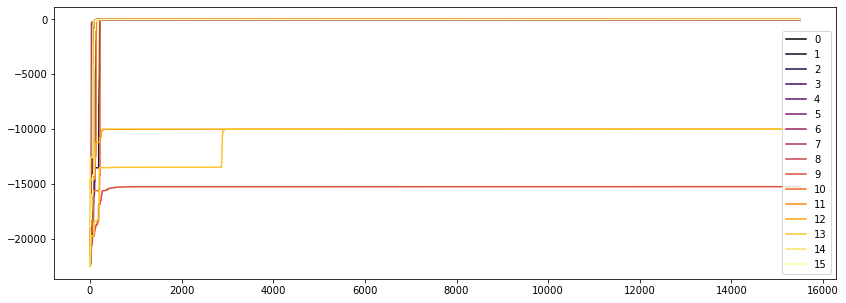

In [13]:
colors = plt.cm.inferno(np.linspace(0,1,n))

var=1
temp =0
plt.figure(figsize=(14,5))

for i in range(0,n):
    plt.plot(loglike[:,temp,i],label=str(i),color=colors[i])

plt.legend()
plt.show()




0 -3.1715249089073536
1 -3.216789019689427
2 -3.13595537764198
3 -3.211969159835561
4 -3.1752837220330368
5 -3.1726492602186926
6 -3.174573060471052
7 -3.2698214123866114
8 -3.2211139502237445
10 -3.148442829411827
11 -3.2309151884352314
14 -3.1605103418996165
15 -3.149413995573113


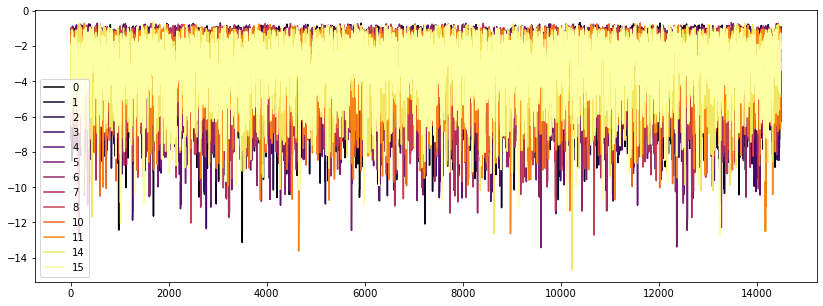

In [14]:
burnin = 1000
# select chains
good_chains = []
for i in range(0,n):
    if np.mean(loglike[burnin:,temp,i])>-10.0:
        print(i, np.mean(loglike[burnin:,temp,i]))
        good_chains.append(i)


plt.figure(figsize=(14,5))

for i in good_chains:
    plt.plot(loglike[burnin:,temp,i],label=str(i),color=colors[i])

plt.legend()
plt.show()

In [16]:
np.log(1000000.0)

13.815510557964274

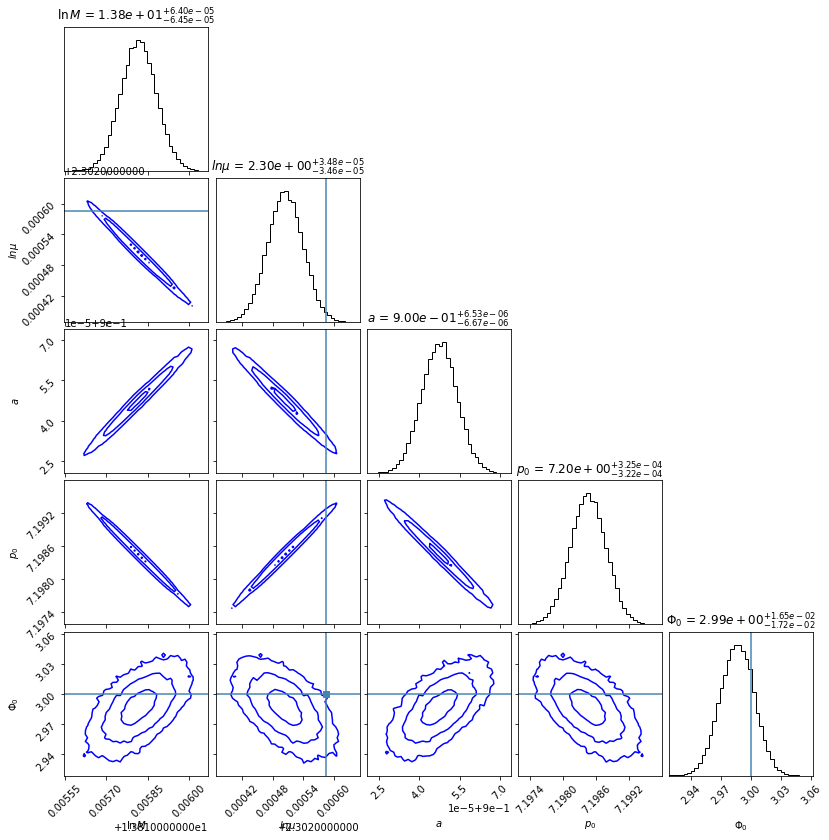

In [15]:
samp = np.array([chains[burnin:,0,good_chains,variable].flatten() for variable in range(n_dim)]).T

inj =[np.log(1000000.0),np.log(10.0),0.9,7.2,3.0]#,0.0]

labels = [
    r"$\ln M$",
    r"$ln\mu$",
    r"$a$",
    r"$p_0$",
   r"$\Phi_0$",
    # r"$q$",
    ]

corner_kwargs=dict(labels=labels,
            levels=(1 - np.exp(-0.5 * np.array([1, 2, 3]) ** 2)),
            bins=40,
            plot_density=False,
            plot_datapoints=False,
            smooth=0.4,
            contour_kwargs={"colors": "blue"},
            hist_kwargs={"density": True},
            truths=inj,
            show_titles=True,
            title_fmt=".2e",
            # quantiles=quantiles

)

fig = corner.corner(samp, **corner_kwargs)
plt.savefig('bias_test.pdf')

In [22]:
(inj - np.median(samp, axis=0))/np.std(samp, axis=0)

array([-4.7261192 ,  2.31485044, -7.14765631,  4.75708568,  0.80268075])

In [17]:
nwalkers = len(good_chains)
for variable in range(n_dim):
    # plt.figure()
    # plt.title('Check chains')
    # for i in good_chains:
    #     plt.plot(chains[burnin:,i,variable], label=str(i))

    # #plt.axhline(injection_params[variable] ,label='true',linestyle='--')
    # plt.legend()
    # plt.show()

    N = len(chains[burnin:,temp,good_chains,variable])
    # Gelman-Rubin statistic
    W = 1/nwalkers * np.sum([ np.var(chains[burnin:,temp,j,variable]) for j in good_chains])
    theta_bar_bar = np.mean([ np.mean(chains[burnin:,temp,j,variable]) for j in good_chains])
    B = N/(nwalkers-1) *  np.sum([(np.mean(chains[burnin:,temp,j,variable]) - theta_bar_bar)**2 for j in good_chains])
    Var = (1-1/N)*W + B/N
    R = np.sqrt(Var/W)
    print('Gelman-Rubin statistic', R, ' for variable ', variable)

Gelman-Rubin statistic 1.003783938717992  for variable  0
Gelman-Rubin statistic 1.003797566737863  for variable  1
Gelman-Rubin statistic 1.003718904129113  for variable  2
Gelman-Rubin statistic 1.0037837737966424  for variable  3
Gelman-Rubin statistic 1.0045761801185653  for variable  4


In [9]:
samp.shape

(188500, 5)

In [10]:
np.quantile(samp[:,-1], 0.95)

0.03025454050593246

In [12]:
covariance = np.cov(samp.T)


In [14]:
np.save("cov_null_test", covariance)

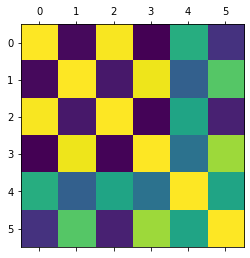

In [13]:
plt.matshow(np.corrcoef(samp.T) )